# Resumen del proyecto
Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?

La realización y entrega del Proyecto es individual.

# Consigna
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

# Metodología
Para el presente proyecto se desarrollará la siguiente metodología:

* **1.** Importe de librerías requeridas.
* **2.** Parte A

##  1. Cargue de librerías requeridas.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas import plotting
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree as Arbol
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans

# PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

* **1.** Detección y eliminación de Outliers
* **2.** Encoding
* **3.** Imputación de valores faltantes
* **4.** Escalado de datos
* **5.** Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

* **a.** Carga del dataset

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

* **b.** Exploracion del dataset (realizado en el proyecto 1)

In [3]:
data.shape

(146660, 19)

In [4]:
data.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
data.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

In [6]:
data.tail()

start_date    end_date  created_on        lat        lon         l1  \
146655  2019-07-31  2019-08-13  2019-07-31 -34.816348 -58.181963  Argentina   
146656  2019-07-31  2019-08-14  2019-07-31 -34.446459 -58.937810  Argentina   
146657  2019-07-31  2019-08-14  2019-07-31 -34.444633 -58.981606  Argentina   
146658  2019-07-31  2019-08-14  2019-07-31 -34.444830 -58.981796  Argentina   
146659  2019-07-31  2019-10-12  2019-07-31 -34.444760 -58.981885  Argentina   

                              l2           l3  rooms  bedrooms  bathrooms  \
146655    Bs.As. G.B.A. Zona Sur  Berazategui    2.0       1.0        1.0   
146656  Bs.As. G.B.A. Zona Norte        Pilar    4.0       3.0        2.0   
146657  Bs.As. G.B.A. Zona Norte        Pilar    1.0       1.0        1.0   
146658  Bs.As. G.B.A. Zona Norte        Pilar    2.0       1.0        1.0   
146659  Bs.As. G.B.A. Zona Norte        Pilar    3.0       2.0        1.0   

        surface_total  surface_covered     price currency  \
146655           54.0             48.0  165000.0      USD   
146656          164.0             90.0  130000.0      USD   
146657           50.0             35.0   73000.0      USD   
146658           38.0             38.0   68000.0      USD   
146659           75.0             75.0   98000.0      USD   

                                                    title  \
146655  Departamento en Venta en Barrio Privado Barran...   
146656  Venta departamentos tres dormitorios jardín co...   
146657  Venta departamento de un ambiente Manzanares C...   
146658           Departamento en Venta. Manzanares chico.   
146659          Departamento en venta en Manzanares Chico   

                                              description property_type  \
146655  Departamento de 2 ambientesCocina con alacena ...  Departamento   
146656  Muy buen duplex a estrenar en dos plantas más ...  Departamento   
146657  En los Condominios de Campo Manzanares Chico, ...  Departamento   
146658  Broker: Maria 11Departamento de dos ambientes ...  Departamento   
146659  Departamento en el Barrio Manzanares Chico , e...  Departamento   

       operation_type  
146655          Venta  
146656          Venta  
146657          Venta  
146658          Venta  
146659          Venta

Se observan incongruencias relacionadas a la relacion a las superficies (superficie total y superficie construida)

In [7]:
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

La exploracion de valores nules permite identificar con que columnas debemos de trabajar con respecto a los valores faltantes.

In [8]:
data["property_type"].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

Obtenes los tipos de propiedades mas predominantes en el dataset.

In [9]:
data["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Se procedera a realizar la exploracion grafica de los valores del dataset

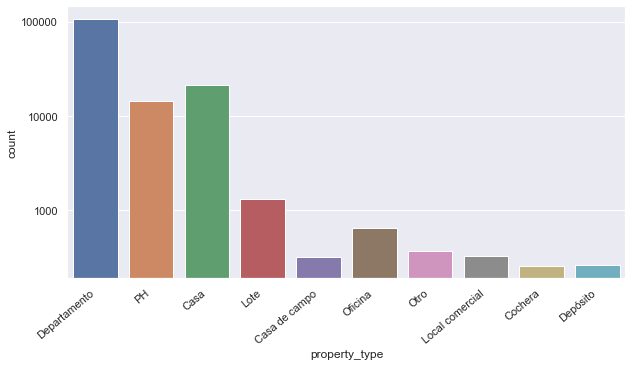

In [10]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
ax = sns.countplot(data = data, x = "property_type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")


plt.show()

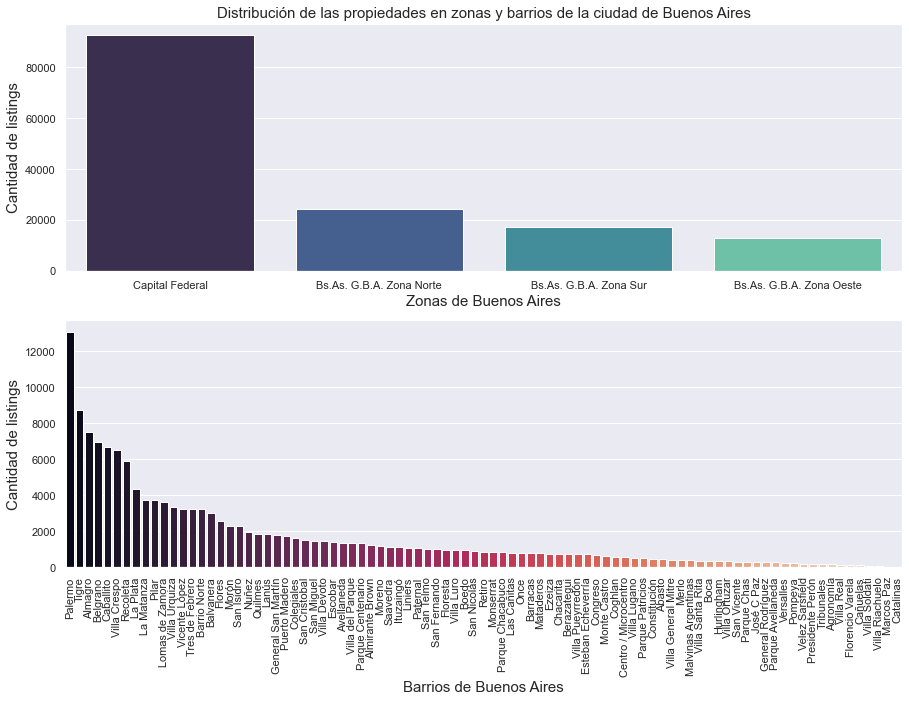

In [11]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(data=data, x = 'l2', order = data.l2.value_counts().index,palette='mako')
plt.xlabel('Zonas de Buenos Aires', size = 15)
plt.ylabel('Cantidad de listings', size = 15)
plt.title('Distribución de las propiedades en zonas y barrios de la ciudad de Buenos Aires', size = 15)

plt.subplot(2,1,2)
sns.countplot(data=data, x = 'l3',order = data.l3.value_counts().index,palette='rocket')
plt.xticks(rotation= 90)
plt.xlabel('Barrios de Buenos Aires', size = 15)
plt.ylabel('Cantidad de listings', size = 15)

#plt.savefig('uno.png')

plt.show()

* **c.** Seleccion del dataset a utilizar
Se utilizara el dataset a partir de los 3 tipos de propiedades mas significativas en el dataset.

In [12]:
properati_df = data[((data['property_type'] == "Departamento") |(data['property_type'] == "Casa") | (data['property_type'] == "PH"))  & (data['l2'] == "Capital Federal")] 
properati_df.shape

(91485, 19)

In [13]:
properati_df.shape

(91485, 19)

* **d.** Ajuste de la superficie: Se garantizará que la superficie cubierta sea siempre menor a la superficie total

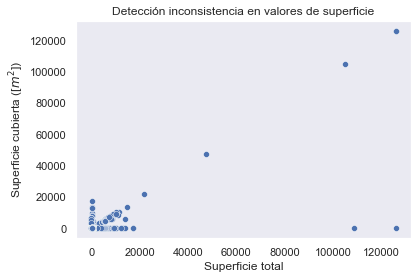

In [14]:
sns.scatterplot(data=properati_df, x='surface_total', y='surface_covered')
plt.title('Detección inconsistencia en valores de superficie')
plt.xlabel('Superficie total')
plt.ylabel('Superficie cubierta ([$m^{2}$])')
plt.grid()

plt.show()

Encontradas las incongruencias, se realiza la eliminación de las mismas.

In [15]:
properati_df.drop(properati_df.loc[properati_df['surface_covered'] > properati_df['surface_total']].index,inplace=True ,axis=0)

C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


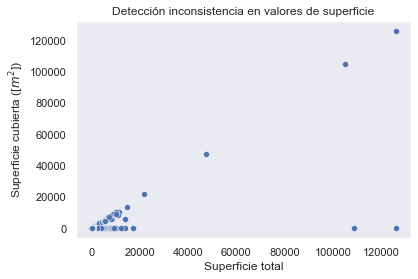

In [16]:
sns.scatterplot(data=properati_df, x='surface_total', y='surface_covered')
plt.title('Detección inconsistencia en valores de superficie')
plt.xlabel('Superficie total')
plt.ylabel('Superficie cubierta ([$m^{2}$])')
plt.grid()

plt.show()

In [17]:
properati_df.shape

(90725, 19)

* **e.** Identificación de columnas con valor único:
Se identificarán columnas con valores únicos.

In [18]:
for i in range(properati_df.shape[1]):
    print(i,len(pd.unique(properati_df.iloc[:,i])))

0 362
1 408
2 362
3 31132
4 31401
5 1
6 1
7 57
8 19
9 16
10 14
11 716
12 572
13 5179
14 1
15 42579
16 57932
17 3
18 1


Se encuentra que las columnas l1, l2, Currency y Operation_type (5, 6, 14 y 18 respectivamente), cuentan con valores únicos. Se eliminarán estas columnas debido a que no son representativas dentro del dataset.

In [19]:
properati_df = properati_df.drop(["l1","l2","currency","operation_type"],axis=1)

* **f.** Identificación de columnas poco significativas:
Se realizará la identificación de la cantidad de valores distintos presentes en cada columna del dataset.

In [20]:
for i in range(properati_df.shape[1]):
    sumatoria=len(pd.unique(properati_df.iloc[:,i]))
    porcentaje=float(sumatoria)/properati_df.shape[0]*100
    print("%d, %d, %.1f%%"%(i,sumatoria,porcentaje))

0, 362, 0.4%
1, 408, 0.4%
2, 362, 0.4%
3, 31132, 34.3%
4, 31401, 34.6%
5, 57, 0.1%
6, 19, 0.0%
7, 16, 0.0%
8, 14, 0.0%
9, 716, 0.8%
10, 572, 0.6%
11, 5179, 5.7%
12, 42579, 46.9%
13, 57932, 63.9%
14, 3, 0.0%


Los valores de la columna 14 (en el dataset, tipo de propiedad) tiene un valor poco significativo debido a que solo trabajamos con 3 valores.

* **g.** Identificación de valores duplicados en el dataset:

In [21]:
properati_df.drop_duplicates(inplace=True)
properati_df.shape

(89114, 15)

* **h.** Eliminación de columnas de poco interés:

In [22]:
dataset = properati_df.drop(["start_date","end_date","title","description"],axis=1)

### Visualización de correlación de columnas en el dataset.

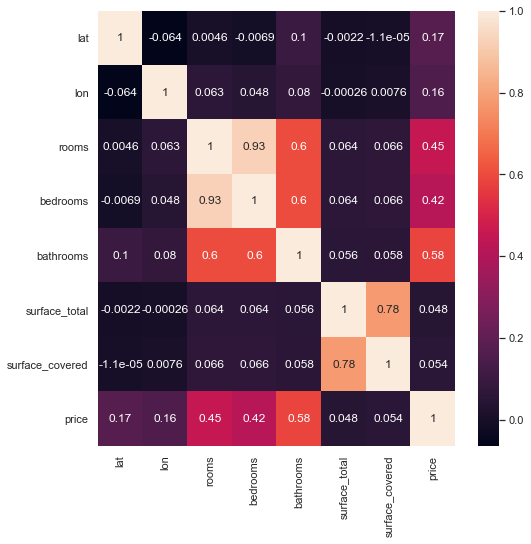

In [23]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

## 1. Detección y eliminación de Outliers

### 1.1 Utilización del rango intercuartil - IQR

Exploración de valores minimos y máximos para Q1 y Q3.

In [24]:
dataset.quantile([.1, .25, .5, .75], axis = 0)

lat        lon  rooms  bedrooms  bathrooms  surface_total  \
0.10 -34.628873 -58.487747    2.0       1.0        1.0           39.0   
0.25 -34.613814 -58.459700    2.0       1.0        1.0           50.0   
0.50 -34.599357 -58.433710    3.0       2.0        1.0           71.0   
0.75 -34.584055 -58.409919    4.0       3.0        2.0          111.0   

      surface_covered     price  
0.10             36.0   90000.0  
0.25             44.0  121525.0  
0.50             63.0  175000.0  
0.75             96.0  278200.0

En el proyecto del Sprint 1 se encontró que la eliminación de outliers usando el IQF a partir de el filtrado por columnas, aunque permitía una eliminación notoria en los diagramas de caja, no eliminaban completamente los outliers. 

Por ende, en esta ocasión, se realizará esta eliminación filtrando por tipo de propiedad.

#### 1.1.1 IQR con Price

In [25]:
for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["price"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["price"].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lim_min = dataset[dataset["property_type"]==x]["price"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    print(x,": El precio maximo es {}, el precio minimo es {} y el IQR {}" .format(lim_max,lim_min,IQR))

Casa : El precio maximo es 826875.0, el precio minimo es 84810.0 y el IQR 234750.0
PH : El precio maximo es 471112.5, el precio minimo es 65000.0 y el IQR 134075.0
Departamento : El precio maximo es 495750.0, el precio minimo es 57000.0 y el IQR 150500.0


In [26]:
dpto = dataset[dataset["property_type"]=="Departamento"]
ph   = dataset[dataset["property_type"]=="PH"]
casa = dataset[dataset["property_type"]=="Casa"]

In [27]:
dpto = dpto[(dpto.price <= 392500.0) & (dpto.price >=65000.0) ]
ph   = ph[(ph.price <= 428500.0) & (ph.price >=75000.0) ]
casa = casa[(casa.price <= 706000.0) & (casa.price >=110000.0) ]

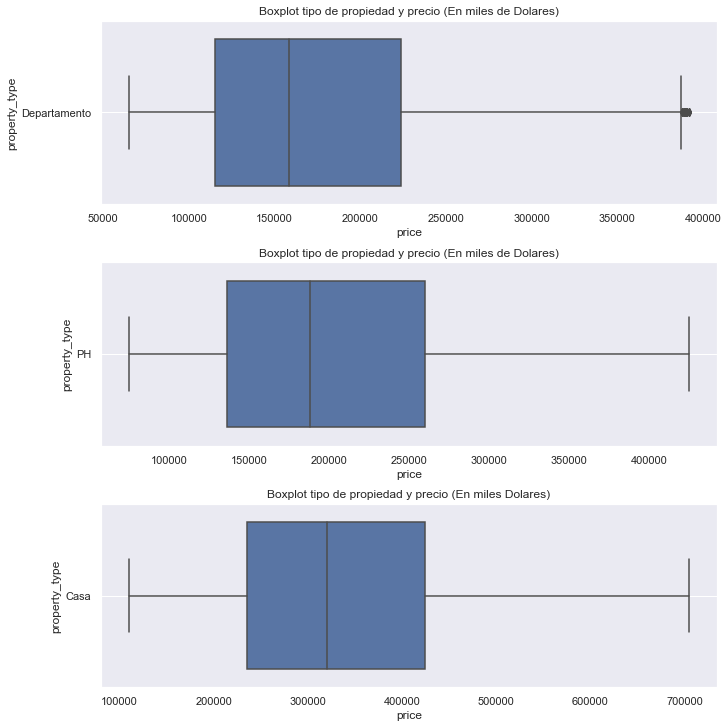

In [28]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))

ax1.set_title("Boxplot tipo de propiedad y precio (En miles de Dolares)")
ax2.set_title("Boxplot tipo de propiedad y precio (En miles de Dolares)")
ax3.set_title("Boxplot tipo de propiedad y precio (En miles Dolares)")

sns.boxplot(data=dpto,x="price",y="property_type",ax=ax1)
sns.boxplot(data=ph,x="price",y="property_type",ax=ax2)
sns.boxplot(data=casa,x="price",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

### 1.1.2 IQR con Rooms

In [29]:
dataset["rooms"].value_counts().sort_index()

1.0      8630
2.0     26511
3.0     27696
4.0     17865
5.0      5330
6.0      1770
7.0       684
8.0       392
9.0        73
10.0       77
11.0       28
12.0       35
13.0        2
14.0        4
15.0        7
16.0        3
18.0        4
21.0        1
26.0        2
Name: rooms, dtype: int64

Se encuentran más monoambientes, valores extremos (como 21 o 26 ambientes) nos hace pensar que se tratan de edificos en arriendo o venta, o tipo hospitales, hostales, etc.

In [30]:
rooms_min_list=[]
rooms_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["rooms"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["rooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["rooms"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    rooms_min_list.append(lim_min)
    rooms_max_list.append(lim_max)
    
    print(x,": El N maximo de habitaciones es {}, el N minimo de habitaciones es {} y el IQR {}" .format(lim_max,lim_min,IQR))

Casa : El N maximo de habitaciones es 9.0, el N minimo de habitaciones es 2.0 y el IQR 2.0
PH : El N maximo de habitaciones es 5.5, el N minimo de habitaciones es 1.3299999999999983 y el IQR 1.0
Departamento : El N maximo de habitaciones es 7.0, el N minimo de habitaciones es 1.0 y el IQR 2.0


In [31]:
dpto= dpto[(dpto.rooms <= 4.0) & (dpto.rooms >=1.0) ]
ph=ph[(ph.rooms <= 5.0) & (ph.rooms >=2.0) ]
casa=casa[(casa.rooms <= 6.0) & (casa.rooms >=2.0) ]

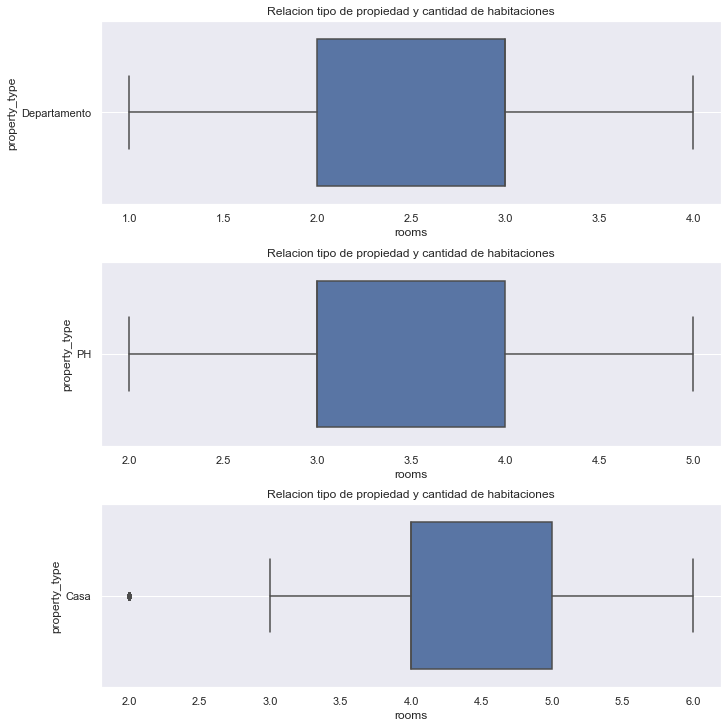

In [32]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))

ax1.set_title("Relacion tipo de propiedad y cantidad de habitaciones")
ax2.set_title("Relacion tipo de propiedad y cantidad de habitaciones")
ax3.set_title("Relacion tipo de propiedad y cantidad de habitaciones")

sns.boxplot(data=dpto,x="rooms",y="property_type",ax=ax1)
sns.boxplot(data=ph,x="rooms",y="property_type",ax=ax2)
sns.boxplot(data=casa,x="rooms",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

Para el caso de Casas se observa que un valor de 5.5 sigue siendo representativo generando algunos outliers en el dataset. Se probará, entonces, aproximando el valor a 5 y observar el resultado.

In [33]:
for i in rooms_max_list:
    floor_max=math.floor(i)

In [34]:
dpto= dpto[(dpto.rooms <= 4.0) & (dpto.rooms >=1.0) ]
ph=ph[(ph.rooms <= 5.0) & (ph.rooms >=2.0) ]
casa=casa[(casa.rooms <= 6.0) & (casa.rooms >=2.0) ]

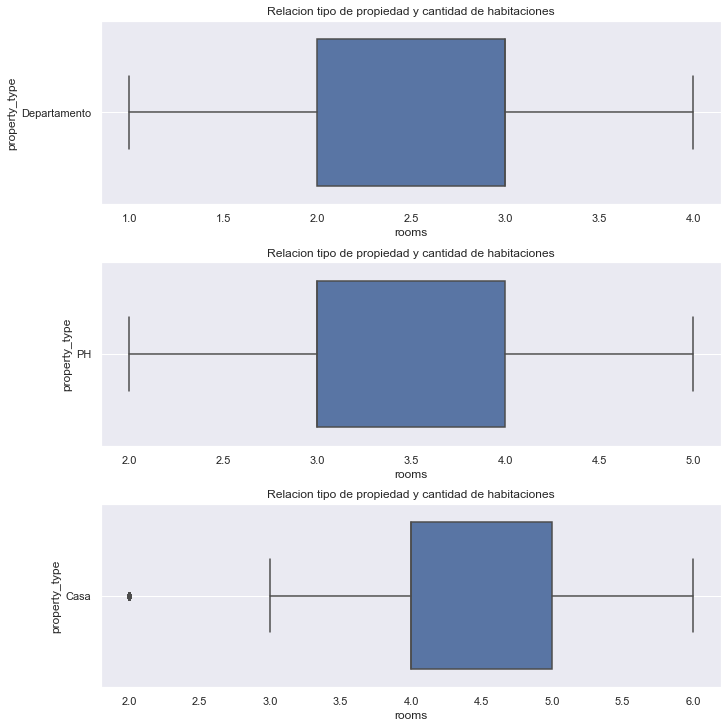

In [35]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))

ax1.set_title("Relacion tipo de propiedad y cantidad de habitaciones")
ax2.set_title("Relacion tipo de propiedad y cantidad de habitaciones")
ax3.set_title("Relacion tipo de propiedad y cantidad de habitaciones")

sns.boxplot(data=dpto,x="rooms",y="property_type",ax=ax1)
sns.boxplot(data=ph,x="rooms",y="property_type",ax=ax2)
sns.boxplot(data=casa,x="rooms",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

### 1.1.3 IQR con bathrooms

In [36]:
dataset["bathrooms"].value_counts().sort_index()

1.0     53374
2.0     22990
3.0      7446
4.0      2301
5.0       664
6.0       140
7.0        38
8.0         4
9.0         4
10.0        7
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64

Los valores máximos en el dataset son minimos equivalentes a más de 11 baños en las propiedades. Esto nos hace suponer que se tratan de propiedades de tipo hotel o hostales.

In [37]:
bath_min_list=[]
bath_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["bathrooms"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["bathrooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["bathrooms"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    bath_min_list.append(lim_min)
    bath_max_list.append(lim_max)
    
    print(x, ": El N maximo de baños es {}, el N minimo de baños es {} y el IQR {}" .format(lim_max,lim_min,IQR))

Casa : El N maximo de baños es 4.5, el N minimo de baños es 1.0 y el IQR 1.0
PH : El N maximo de baños es 3.5, el N minimo de baños es 1.0 y el IQR 1.0
Departamento : El N maximo de baños es 3.5, el N minimo de baños es 1.0 y el IQR 1.0


Se presenta la misma situación de la parte decimal de los máximos y mínimos. Se procederá a aproximar el resultado.

In [38]:
for i in bath_max_list:
    b_floor_max=math.floor(i)

In [39]:
dpto= dpto[(dpto.bathrooms <= 3.0) & (dpto.bathrooms >=1.0) ]
ph=ph[(ph.bathrooms <= 3.0) & (ph.bathrooms >=1.0) ]
casa=casa[(casa.bathrooms <= 4.0) & (casa.bathrooms >=1.0) ]

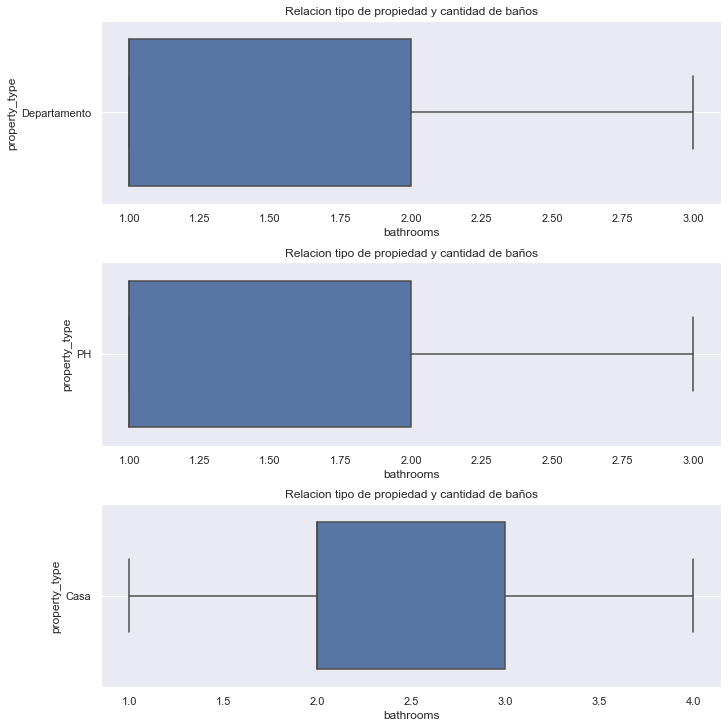

In [40]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))

ax1.set_title("Relacion tipo de propiedad y cantidad de baños")
ax2.set_title("Relacion tipo de propiedad y cantidad de baños")
ax3.set_title("Relacion tipo de propiedad y cantidad de baños")

sns.boxplot(data=dpto,x="bathrooms",y="property_type",ax=ax1)
sns.boxplot(data=ph,x="bathrooms",y="property_type",ax=ax2)
sns.boxplot(data=casa,x="bathrooms",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

### 1.1.4 IQR con bedrooms

In [41]:
dataset["bedrooms"].value_counts().sort_index()

0.0      2189
1.0     33166
2.0     28464
3.0     19224
4.0      4711
5.0       796
6.0       305
7.0       174
8.0        33
9.0        16
10.0       13
11.0        4
12.0        9
13.0        2
14.0        2
15.0        6
Name: bedrooms, dtype: int64

Al igual que en los casos anteriores. Los valores máximos se alcanzan en valores extremadamente altos en comparación a la media. El número alto de cuartos pueden estar en relación al elevado número de ambientes. En el proyecto uno, en la exploración de la descripción de algunas propiedades efectivamente se encontró que se encuentran propiedades de tipo hospitales o hoteles.

In [42]:
bedr_min_list=[]
bedr_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["bedrooms"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["bedrooms"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["bedrooms"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    bedr_min_list.append(lim_min)
    bedr_max_list.append(lim_max)
    
    print(x, ": El # maximo de dormitorios es {}, el N minimo de dormitorios es {} y el IQR {}" .format(lim_max,lim_min,IQR))

Casa : El # maximo de dormitorios es 5.5, el N minimo de dormitorios es 1.0 y el IQR 1.0
PH : El # maximo de dormitorios es 4.5, el N minimo de dormitorios es 1.0 y el IQR 1.0
Departamento : El # maximo de dormitorios es 3.5, el N minimo de dormitorios es 0.0 y el IQR 1.0


Redondeando al decimal más próximo

In [43]:
for i in bedr_max_list:
    br_floor_max=math.floor(i)

In [44]:
dptos= dpto[(dpto.bedrooms <= 3.0) & (dpto.bedrooms >=0.0) ]
phs=ph[(ph.bedrooms <= 4.0) & (ph.bedrooms >=1.0) ]
casas=casa[(casa.bedrooms <= 5.0) & (casa.bedrooms >=1.0) ]

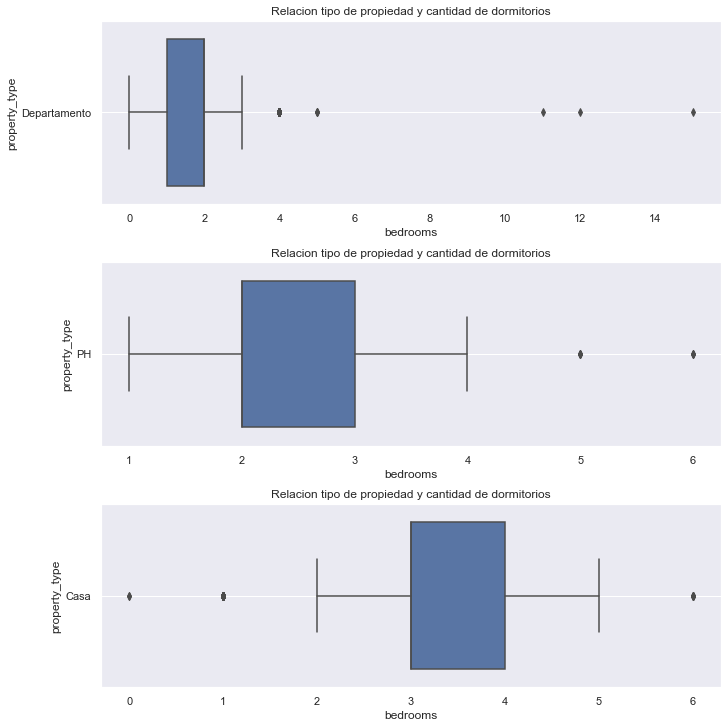

In [45]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))

ax1.set_title("Relacion tipo de propiedad y cantidad de dormitorios")
ax2.set_title("Relacion tipo de propiedad y cantidad de dormitorios")
ax3.set_title("Relacion tipo de propiedad y cantidad de dormitorios")

sns.boxplot(data=dpto,x="bedrooms",y="property_type",ax=ax1)
sns.boxplot(data=ph,x="bedrooms",y="property_type",ax=ax2)
sns.boxplot(data=casa,x="bedrooms",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

Se detectan algunos outliers; aun así, se mantendrán y se observará una vez completado el punto A.

### 1.1.5 IQR con superficie total

Se realiza la misma metodología realizada en las demás columnas.

In [46]:
surfT_min_list=[]
surfT_max_list=[]

for x in ["Casa","PH", "Departamento"]:
    Q1 = dataset[dataset["property_type"]==x]["surface_total"].quantile(0.25)
    Q3 = dataset[dataset["property_type"]==x]["surface_total"].quantile(0.75)
    IQR = Q3 - Q1
    lim_min = dataset[dataset["property_type"]==x]["surface_total"].quantile(0.01)
    lim_max = Q3 + (IQR*1.5)
    
    surfT_min_list.append(lim_min)
    surfT_max_list.append(lim_max)
    
    print(x, ": El maximo de surface total es {}, el minimo de surface total es {} y el IQR {}" .format(lim_max,lim_min,IQR))

Casa : El maximo de surface total es 593.0, el minimo de surface total es 56.0 y el IQR 170.0
PH : El maximo de surface total es 275.0, el minimo de surface total es 35.0 y el IQR 82.0
Departamento : El maximo de surface total es 177.0, el minimo de surface total es 26.0 y el IQR 52.0


In [47]:
dpto= dpto[(dpto.surface_total <= 182.91) & (dpto.surface_total >=26.0) ]
ph=ph[(ph.surface_total <= 275.0) & (ph.surface_total >=35.0) ]
casa=casa[(casa.surface_total <= 583.12) & (casa.surface_total >=56.81) ]

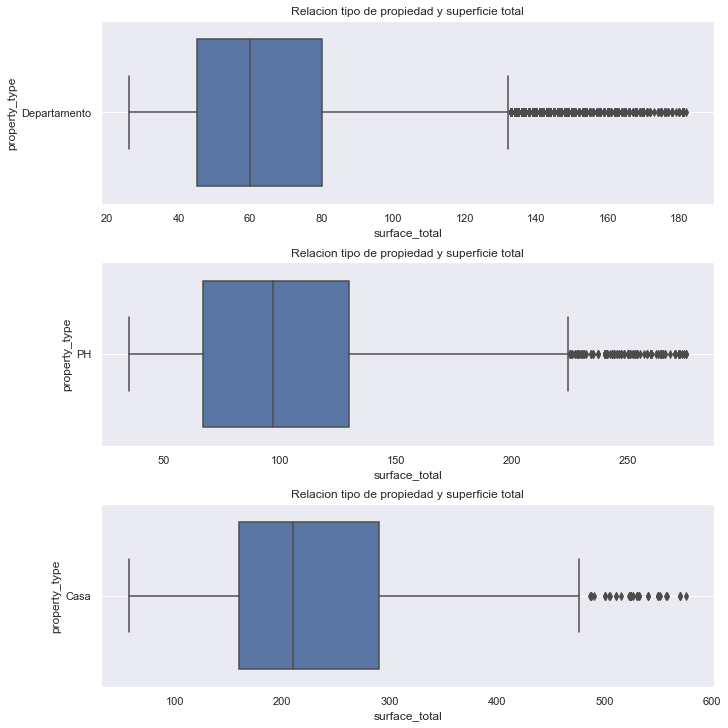

In [48]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(10,10))

ax1.set_title("Relacion tipo de propiedad y superficie total")
ax2.set_title("Relacion tipo de propiedad y superficie total")
ax3.set_title("Relacion tipo de propiedad y superficie total")

sns.boxplot(data=dpto,x="surface_total",y="property_type",ax=ax1)
sns.boxplot(data=ph,x="surface_total",y="property_type",ax=ax2)
sns.boxplot(data=casa,x="surface_total",y="property_type",ax=ax3)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

### 1.1.6 Concatenar resultados

Visión actual del dataset.

In [49]:
dataset.shape

(89114, 11)

Concatenación de las variables.

In [50]:
conc_1=[dpto,ph,casa]
dataset= pd.concat(conc_1)
dataset.head(5)

created_on        lat        lon      l3  rooms  bedrooms  bathrooms  \
11  2019-10-17 -34.603683 -58.381557   Boedo    2.0       1.0        1.0   
12  2019-10-17 -34.630349 -58.417223   Boedo    2.0       1.0        1.0   
20  2019-10-17 -34.608246 -58.444262  Abasto    2.0       1.0        1.0   
22  2019-10-17 -34.626240 -58.462078  Flores    2.0       1.0        1.0   
23  2019-10-17 -34.625611 -58.462403  Flores    2.0       1.0        1.0   

    surface_total  surface_covered     price property_type  
11           68.0             59.0  149000.0  Departamento  
12           50.0             44.0  115000.0  Departamento  
20           31.0             31.0   75000.0  Departamento  
22           45.0             45.0   95000.0  Departamento  
23           45.0             45.0   95000.0  Departamento

In [297]:
dataset.shape

(64205, 11)

### 1.1.7 Visualización general del dataset

<AxesSubplot:>

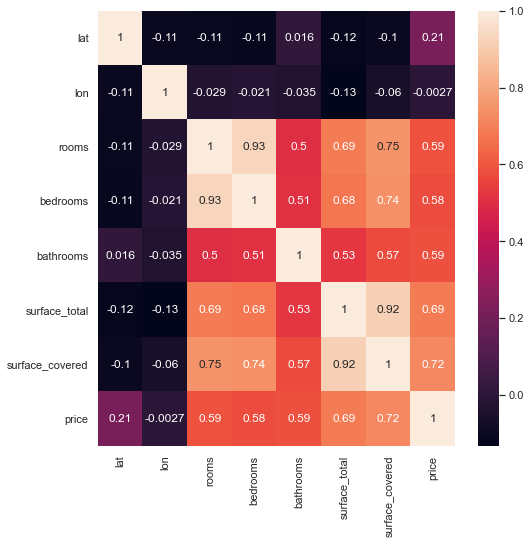

In [298]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(dataset.corr(), annot=True)

### 1.2 Encoding

Visualización general del dataset.

In [299]:
dataset.head()

created_on        lat        lon      l3  rooms  bedrooms  bathrooms  \
11  2019-10-17 -34.603683 -58.381557   Boedo    2.0       1.0        1.0   
12  2019-10-17 -34.630349 -58.417223   Boedo    2.0       1.0        1.0   
20  2019-10-17 -34.608246 -58.444262  Abasto    2.0       1.0        1.0   
22  2019-10-17 -34.626240 -58.462078  Flores    2.0       1.0        1.0   
23  2019-10-17 -34.625611 -58.462403  Flores    2.0       1.0        1.0   

    surface_total  surface_covered     price property_type  
11           68.0             59.0  149000.0  Departamento  
12           50.0             44.0  115000.0  Departamento  
20           31.0             31.0   75000.0  Departamento  
22           45.0             45.0   95000.0  Departamento  
23           45.0             45.0   95000.0  Departamento

Se trabajará inicialmente con la columna de created_on.

In [300]:
dataset["fecha"] = pd.to_datetime(dataset.created_on, format="%Y-%m-%d")
dataset.drop("created_on",axis=1,inplace=True)
dataset.head()

lat        lon      l3  rooms  bedrooms  bathrooms  surface_total  \
11 -34.603683 -58.381557   Boedo    2.0       1.0        1.0           68.0   
12 -34.630349 -58.417223   Boedo    2.0       1.0        1.0           50.0   
20 -34.608246 -58.444262  Abasto    2.0       1.0        1.0           31.0   
22 -34.626240 -58.462078  Flores    2.0       1.0        1.0           45.0   
23 -34.625611 -58.462403  Flores    2.0       1.0        1.0           45.0   

    surface_covered     price property_type      fecha  
11             59.0  149000.0  Departamento 2019-10-17  
12             44.0  115000.0  Departamento 2019-10-17  
20             31.0   75000.0  Departamento 2019-10-17  
22             45.0   95000.0  Departamento 2019-10-17  
23             45.0   95000.0  Departamento 2019-10-17

In [301]:
dataset['año'] = pd.DatetimeIndex(dataset['fecha']).year
dataset.drop("fecha",axis=1,inplace=True)
dataset.head()

lat        lon      l3  rooms  bedrooms  bathrooms  surface_total  \
11 -34.603683 -58.381557   Boedo    2.0       1.0        1.0           68.0   
12 -34.630349 -58.417223   Boedo    2.0       1.0        1.0           50.0   
20 -34.608246 -58.444262  Abasto    2.0       1.0        1.0           31.0   
22 -34.626240 -58.462078  Flores    2.0       1.0        1.0           45.0   
23 -34.625611 -58.462403  Flores    2.0       1.0        1.0           45.0   

    surface_covered     price property_type   año  
11             59.0  149000.0  Departamento  2019  
12             44.0  115000.0  Departamento  2019  
20             31.0   75000.0  Departamento  2019  
22             45.0   95000.0  Departamento  2019  
23             45.0   95000.0  Departamento  2019

In [302]:
Labelencoder= LabelEncoder()
Labelencoder.fit(dataset["año"])
dataset["años"] = Labelencoder.transform(dataset["año"])
dataset.drop("año",axis=1,inplace=True)

Se transforma entonces la ultima columna para denotar los años 2019 y 2020 como 0 1 y respectivamente.

In [303]:
dataset.head(-5)

lat        lon            l3  rooms  bedrooms  bathrooms  \
11     -34.603683 -58.381557         Boedo    2.0       1.0        1.0   
12     -34.630349 -58.417223         Boedo    2.0       1.0        1.0   
20     -34.608246 -58.444262        Abasto    2.0       1.0        1.0   
22     -34.626240 -58.462078        Flores    2.0       1.0        1.0   
23     -34.625611 -58.462403        Flores    2.0       1.0        1.0   
...           ...        ...           ...    ...       ...        ...   
145296 -34.638175 -58.454397        Flores    4.0       3.0        1.0   
145332 -34.678970 -58.485073  Villa Lugano    4.0       3.0        2.0   
145352 -34.643295 -58.467017        Flores    5.0       3.0        2.0   
145368 -34.644531 -58.521780       Liniers    5.0       4.0        3.0   
145547 -34.640486 -58.468197        Flores    5.0       3.0        3.0   

        surface_total  surface_covered     price property_type  años  
11               68.0             59.0  149000.0  Departamento     0  
12               50.0             44.0  115000.0  Departamento     0  
20               31.0             31.0   75000.0  Departamento     0  
22               45.0             45.0   95000.0  Departamento     0  
23               45.0             45.0   95000.0  Departamento     0  
...               ...              ...       ...           ...   ...  
145296          150.0            120.0  200000.0          Casa     1  
145332          160.0            140.0  140000.0          Casa     1  
145352          230.0            155.0  219000.0          Casa     1  
145368          210.0            165.0  328000.0          Casa     1  
145547          190.0            155.0  259500.0          Casa     1  

[64200 rows x 11 columns]

In [304]:
dataset["años"].value_counts().sort_index()

0    59931
1     4274
Name: años, dtype: int64

Ahora se realizará el mismo procedimiento para el tipo de propiedad.

In [305]:
Labelencoder= LabelEncoder()
Labelencoder.fit(dataset["property_type"])
dataset["tipo_propiedad"] = Labelencoder.transform(dataset["property_type"])
dataset.drop("property_type",axis=1,inplace=True)

In [306]:
Labelencoder.classes_

array(['Casa', 'Departamento', 'PH'], dtype=object)

In [ ]:
#####

In [307]:
Labelencoder.transform(["Casa", "Departamento", "PH"])

array([0, 1, 2])

In [308]:
dataset.head(-5)

lat        lon            l3  rooms  bedrooms  bathrooms  \
11     -34.603683 -58.381557         Boedo    2.0       1.0        1.0   
12     -34.630349 -58.417223         Boedo    2.0       1.0        1.0   
20     -34.608246 -58.444262        Abasto    2.0       1.0        1.0   
22     -34.626240 -58.462078        Flores    2.0       1.0        1.0   
23     -34.625611 -58.462403        Flores    2.0       1.0        1.0   
...           ...        ...           ...    ...       ...        ...   
145296 -34.638175 -58.454397        Flores    4.0       3.0        1.0   
145332 -34.678970 -58.485073  Villa Lugano    4.0       3.0        2.0   
145352 -34.643295 -58.467017        Flores    5.0       3.0        2.0   
145368 -34.644531 -58.521780       Liniers    5.0       4.0        3.0   
145547 -34.640486 -58.468197        Flores    5.0       3.0        3.0   

        surface_total  surface_covered     price  años  tipo_propiedad  
11               68.0             59.0  149000.0     0               1  
12               50.0             44.0  115000.0     0               1  
20               31.0             31.0   75000.0     0               1  
22               45.0             45.0   95000.0     0               1  
23               45.0             45.0   95000.0     0               1  
...               ...              ...       ...   ...             ...  
145296          150.0            120.0  200000.0     1               0  
145332          160.0            140.0  140000.0     1               0  
145352          230.0            155.0  219000.0     1               0  
145368          210.0            165.0  328000.0     1               0  
145547          190.0            155.0  259500.0     1               0  

[64200 rows x 11 columns]

In [319]:
dataset.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'años', 'tipo_propiedad'],
      dtype='object')

Se ordena el dataset

In [321]:
dataset = dataset[['años','lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'tipo_propiedad']]

### 1.3 Imputación de valores faltantes

Se partirá de una copia del dataset llevado hasta ahora.

In [309]:
properaty_copy = dataset.copy()

In [310]:
properaty_copy.isnull().sum()

lat                2779
lon                2779
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered     383
price                 0
años                  0
tipo_propiedad        0
dtype: int64

Se observan las columnas lat y lon como las de mayor presencia de valores faltnas, lo que permite concluir que existen propiedades sin registro de ubicación en el dataset. Igualmente la variable superficie cubierta, lo que permite suponer que se tratan de propiedades no construidas (lotes sin ocupar).

In [311]:
X=properaty_copy.drop(["price","años","lat","lon","tipo_propiedad","l3","rooms","bedrooms",
                       "bathrooms","surface_total"],axis=1)
y=properaty_copy["price"]
X.head()

surface_covered
11             59.0
12             44.0
20             31.0
22             45.0
23             45.0

### 1.3.1 Imputación estadística

In [312]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor()
result_2 = []
rmse = []

tipos = ['mean', 'median', 'most_frequent', 'constant']

for t in tipos:
    imputer=SimpleImputer(strategy=t)
    imputer.fit(X)
    
    X_trans= imputer.transform(X)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_trans,y)
    
    y_pred = tree.predict(X_trans)
    
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    
    result_2.append(r2)
    rmse.append(RMSE)
    print('Estrategia usada: ',t)
    print('RMSE: ',RMSE)
    print('R2:',r2)
    print("----------------------------------")

Estrategia usada:  mean
RMSE:  51876.569780253056
R2: 0.5873198273698087
----------------------------------
Estrategia usada:  median
RMSE:  51877.18736804503
R2: 0.587310001440501
----------------------------------
Estrategia usada:  most_frequent
RMSE:  51954.89972346803
R2: 0.5860726508885421
----------------------------------
Estrategia usada:  constant
RMSE:  51876.353026822566
R2: 0.5873232759268979
----------------------------------


Para el caso de imputación estadística, los metodos de mean y constant arrojan los mejores resultados.

### 1.3.2 Imputación con KNN

In [313]:
vecinos = [1,3,6,12,18,21,24]
for v in vecinos:
    
    KNN_imputer=KNNImputer(n_neighbors=v)
    KNN_imputer.fit(X)
    
    X_knn= KNN_imputer.transform(X)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_knn,y)
    
    y_pred = tree.predict(X_knn)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    
    print("Vecinos utilizadps: ",v)
    print("RMSE:",RMSE)
    print("R cuadrado:",r2)
    print("-----------------------------")

Vecinos utilizadps:  1
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
-----------------------------
Vecinos utilizadps:  3
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
-----------------------------
Vecinos utilizadps:  6
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
-----------------------------
Vecinos utilizadps:  12
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
-----------------------------
Vecinos utilizadps:  18
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
-----------------------------
Vecinos utilizadps:  21
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
-----------------------------
Vecinos utilizadps:  24
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
-----------------------------


Resultado independientes del número de vecinos.

### 1.3.3 Imputación con Iteración

In [314]:
tipos2 = ['ascending', 'descending', 'roman', 'arabic', 'random']

for t in tipos2:
    iter_imputer=IterativeImputer(imputation_order=t)
    iter_imputer.fit(X)
    
    X_iter= iter_imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_iter,y)
    
    y_pred = tree.predict(X_iter)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))

    print("Método utilizado:",t)
    print("RMSE:",RMSE)
    print("R cuadrado:",r2)
    print("----------------------------------")

Método utilizado: ascending
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
----------------------------------
Método utilizado: descending
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
----------------------------------
Método utilizado: roman
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
----------------------------------
Método utilizado: arabic
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
----------------------------------
Método utilizado: random
RMSE: 51876.569780253056
R cuadrado: 0.5873198273698087
----------------------------------


**Conclusión:** Para el caso de solo tener una columna con valores faltantes, los métodos explorados no generan grandes cambios. Para efectos del proyecto se utilizará la imputación con KNN por interés de los cientificos de datos.

In [322]:
dataset.isnull().sum()

años                  0
lat                2779
lon                   0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered     383
price                 0
tipo_propiedad        0
dtype: int64

In [324]:
KNN_imputer=KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(dataset.iloc[:,6:9])
dataset.iloc[:,6:9]=KNN_imputer.transform(dataset.iloc[:,6:9])

In [325]:
KNN_imputer=KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(dataset.iloc[:,1:3])
dataset.iloc[:,1:3]=KNN_imputer.transform(dataset.iloc[:,1:3])

In [326]:
dataset.isnull().sum()

años               0
lat                0
lon                0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
tipo_propiedad     0
dtype: int64

### 1.4 Escalado de datos

In [327]:
from sklearn import preprocessing

In [329]:
properati_df = dataset.copy()
X = properati_df.drop("price",axis=1)
y = properati_df["price"]

In [330]:
robust_sc = preprocessing.RobustScaler()
standard_sc = preprocessing.StandardScaler() 
minmax_sc = preprocessing.MinMaxScaler() 

In [332]:
for x in [robust_sc,standard_sc,minmax_sc]:
    scaler = x.fit(X)
    X_new = x.transform(X)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_new,y)
    
    y_pred = tree.predict(X_new)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    
    print("Escalado usado: ",x)
    print("RMSE:",RMSE)
    print("R cuadrado: ", r2)
    print("----------------------------------------")

Escalado usado:  RobustScaler()
RMSE: 33893.66895667504
R cuadrado:  0.8238396084402335
----------------------------------------
Escalado usado:  StandardScaler()
RMSE: 33893.66895667504
R cuadrado:  0.8238396084402335
----------------------------------------
Escalado usado:  MinMaxScaler()
RMSE: 33893.66895667504
R cuadrado:  0.8238396084402335
----------------------------------------
